## Bivariate Analysis

* Bivariate analysis is a statistical method that helps you study relationships (correlation) between data sets

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


## Case study 1


### Problem Feature:(Heart Disease)

### Data Set: 

   * age - age in years 
   * sex - (1 = male; 0 = female) 
   * cp - chest pain type 
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
   * chol - serum cholestoral in mg/dl 
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   * restecg - resting electrocardiographic results 
   * exang - exercise induced angina (1 = yes; 0 = no) 
   * oldpeak - ST depression induced by exercise relative to rest 
   * slope - the slope of the peak exercise ST segment 
   * ca - number of major vessels (0-3) colored by flourosopy 
   * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   * target - have disease or not (1=yes, 0=no)



### 1.1 Loading the libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 import the dataset ?

In [0]:
df = pd.read_csv('heart.csv')

### 1.3 How to see the size of your data?

In [4]:
df.size

4242

### 1.4 How to view the statistical characteristics of the data?

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.5 How to see just one column?

In [9]:
df.age

0      63
1      37
2      41
3      56
4      57
5      57
6      56
7      44
8      52
9      57
10     54
11     48
12     49
13     64
14     58
15     50
16     58
17     66
18     43
19     69
20     59
21     44
22     42
23     61
24     40
25     71
26     59
27     51
28     65
29     53
       ..
273    58
274    47
275    52
276    58
277    57
278    58
279    61
280    42
281    52
282    59
283    40
284    61
285    46
286    59
287    57
288    57
289    55
290    61
291    58
292    58
293    67
294    44
295    63
296    63
297    59
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

### 1.6 How to check the column names?

In [11]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

### 1.7 Find the Numerical Features,Categorical Features, Alphanumeric Features?

In [13]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Change the column names?

In [0]:
#Change the sex(0,1)=(female,male)
df['sex'].replace(0, 'female',inplace=True)
df['sex'].replace(1, 'male',inplace=True)

## 1.8 Categorical vs. Quantitative

    * Categorical: chest_pain_type, Sex, fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
    * Numerical Features: Age (Continuous), resting_blood_pressure ,cholesterol,max_heart_rate_achieved,st_depression, num_major_vessels,target

### 1.8a) Create bar plot for showing Gender and target. And your Observation:

sex,female,male
target,,
0,17.391304,82.608696
1,43.636364,56.363636


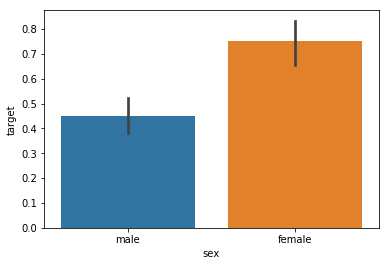

In [20]:

#draw a bar plot of target by sex
sns.barplot(x='sex',y='target',data=df)

#print percentages of females vs. males Heart Disease
pd.crosstab(df['target'],df['sex']).apply(lambda r: r/r.sum() *100, axis=1)

### Observation:



In [0]:
#females will die soon 

### 1.8b) Create Bar plot for checking the both target vs Sex. And your Observations?

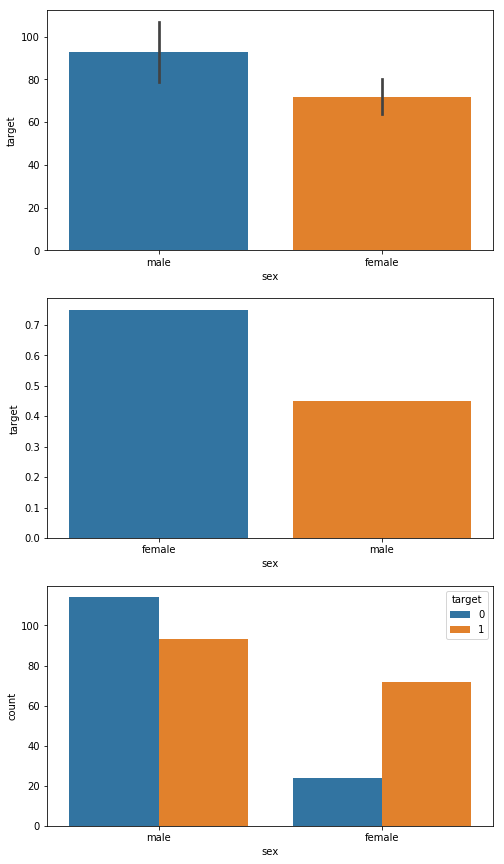

In [22]:
#create a subplot
fig, (ax) = plt.subplots(3,1,figsize=(8,15))
sns.barplot(data=df,x="sex",y="target",estimator=sum,ax=ax[0])


# create bar plot using groupby
embark_perc = df[["sex", "target"]].groupby(['sex'],as_index=False).mean()
sns.barplot(x='sex', y='target', data=embark_perc,ax=ax[1])

# create count plot
sns.countplot('sex',hue='target',data=df,ax=ax[2])


#### Observation:
   

### 1.8d) Create Bar plot for checking the both Number Of people having chest_pain_type vs chest_pain_type:Heart Disease or Not. And your Observations?

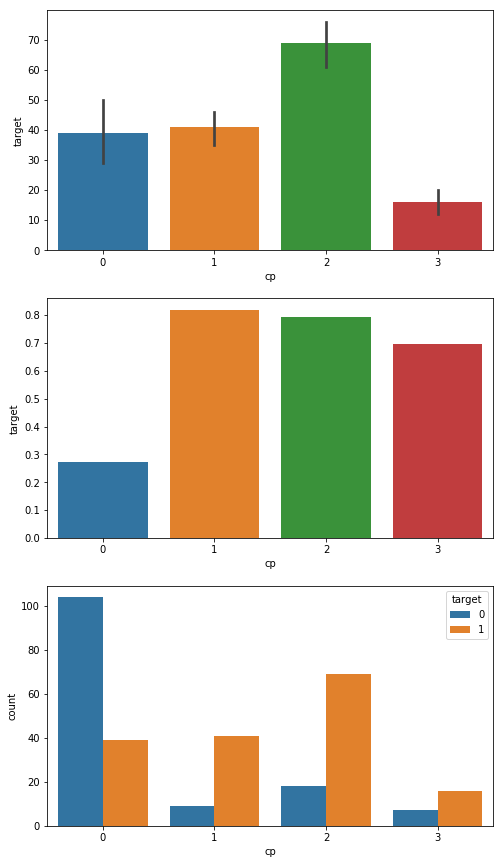

In [44]:
# create subplot plot
df.head()
fig, (ax) = plt.subplots(3,1,figsize=(8,15))
sns.barplot(data=df,x="cp",y="target",estimator=sum,ax=ax[0])


# create bar plot using groupby
embark_perc = df[["cp", "target"]].groupby(['cp'],as_index=False).mean()
sns.barplot(x='cp', y='target', data=embark_perc,ax=ax[1])

# # create count plot
sns.countplot('cp',hue='target',data=df,ax=ax[2])


#### Observation:

  

### 1.8c) Create violinplot plot for checking the fasting_blood_sugar and Age vs target'. And your Observations?

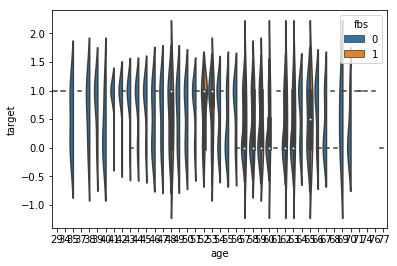

In [32]:
#create violinplot plot using groupby
sns.violinplot("age","target", hue="fbs", data=df,split=True)

#### Observations:
   

## Box Plot
a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 

### 1.8 d)create a box plot for Sex & Age . And your Observations?

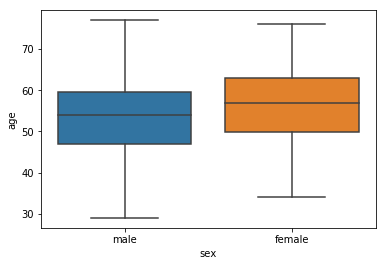

In [33]:
# create boxplot
sns.boxplot(x='sex',y='age',data=df)

### Observations: 
    

# 1.9 Categorical vs. Categorical

* Categorical: target, Sex.

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



### 1.9a) Create a Stacked bar chart for showing target & Sex. And your Observations?

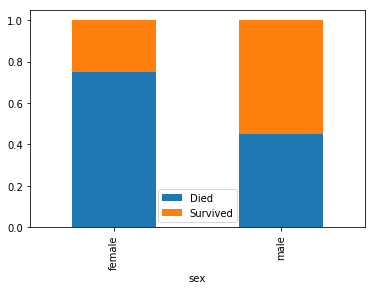

In [36]:
#create crosstab
pd.crosstab(df.sex, df.target).apply(lambda r: r/r.sum(), axis=1)


df_g = df.groupby(['sex'])['target'].agg([np.mean, lambda x: 1-np.mean(x)])
df_g.columns = ['Died', 'Survived']
df_g.plot.bar(stacked=True)

#### Observations:
    
    

# 1.10 Quantitative vs. Quantitative

### 1.10a) Create a scatter plot for showing age & st_depression. And your Observations?¶

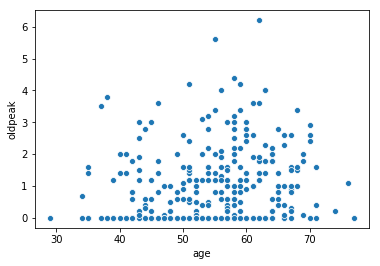

In [39]:
sns.scatterplot(x="age", y="oldpeak", data=df)

Observation:
   

# 2. Seasonality and looking at trended data:


### 2. 1 Create a Seasonality and looking at trended data. And write your Observations?


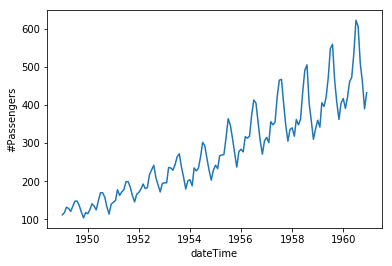

In [40]:
#Load the data = AirPassengers.csv
air = pd.read_csv('AirPassengers (1).csv')
air['dateTime'] = pd.to_datetime(air.Month)
# Plot subplot 
sns.lineplot(data=air, x='dateTime', y='#Passengers')

Observations:


# THE END